In [1]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import os 
import plotly.express as px

In [2]:
#!pip install -U kaleido

In [4]:
PathsIBGE = "others/areas-pixels-Coincidentes-UF-IBGE-MB-Caatinga.csv"
print("path ", PathsIBGE)
PathColseInt_8 = "others/areas-pixels_permanentes-UF_Caat.csv"
print("path entre Mapbiomas ", PathColseInt_8)

path  others/areas-pixels-Coincidentes-UF-IBGE-MB-Caatinga.csv
path entre Mapbiomas  others/areas-pixels_permanentes-UF_Caat.csv


## set parametros  iniciais

In [49]:
dict_color_concordancia = {
            '1': '#E6DBAC',
            '2': '#373737',
        }
dict_CColor_concordancia = {
            '<b> Concordante CC</b>': '#E6DBAC',
            '<b> Discordante CC</b>': '#373737',
        }
dict_color_col8 = {
            '1': '#f6f4d2',
            '2': '#672f28',
        }
dict_CColor_col8 = {
            '<b> Discordante CC</b>': '#f6f4d2',
            '<b> Concordante CC</b>': '#672f28',
        }
dict_nameIncid = {
            '1': '<b> Discordante CC</b>',
            '2': '<b> Concordante CC</b>'
}

## funções de PLOTs

In [59]:
def plot_pie_areasEstaveis(df_tmp, titlePlot, dict_color, nameLegend):
    fig = px.pie(
        df_tmp, 
        values='area', 
        names='name_class',
        hole= 0.6,
        hover_data=['name_class'],
        color='name_class',
        color_discrete_map= dict_color
    )
    fig.update_traces(
        textposition= 'outside', # "inside"
        textinfo='label + percent',
        textfont_size= 16,
        marker=dict(line=dict(color='#000000', width=1))
    )
    fig.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         automargin=True, 
        #         yref='paper'),
        width = 550,
        height = 550,
        showlegend= False,
        # legend_title=nameLegend,
        # legend_title_font_size=15
    )
    fig.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    fig.write_image("imagePPT/" + titlePlot + '.png')

## Fazer graficos de pizza para anos especificos no loop

columnas dfTable Index(['area', 'class', 'year'], dtype='object')
           area  class  year
0      0.001786      1  2000
1  48999.584390      1  2000
2  69805.581342      2  2000
3  68396.656325      1  2000
4  80477.385607      2  2000
agrupando por classe temos  (14, 3)
    class  year           area              name_class
0     1  2000  405289.365978  <b> Discordante CC</b>
1     1  2010  392833.174815  <b> Discordante CC</b>
2     1  2012  385779.897994  <b> Discordante CC</b>
3     1  2014  382519.376617  <b> Discordante CC</b>
4     1  2016  382757.939680  <b> Discordante CC</b>


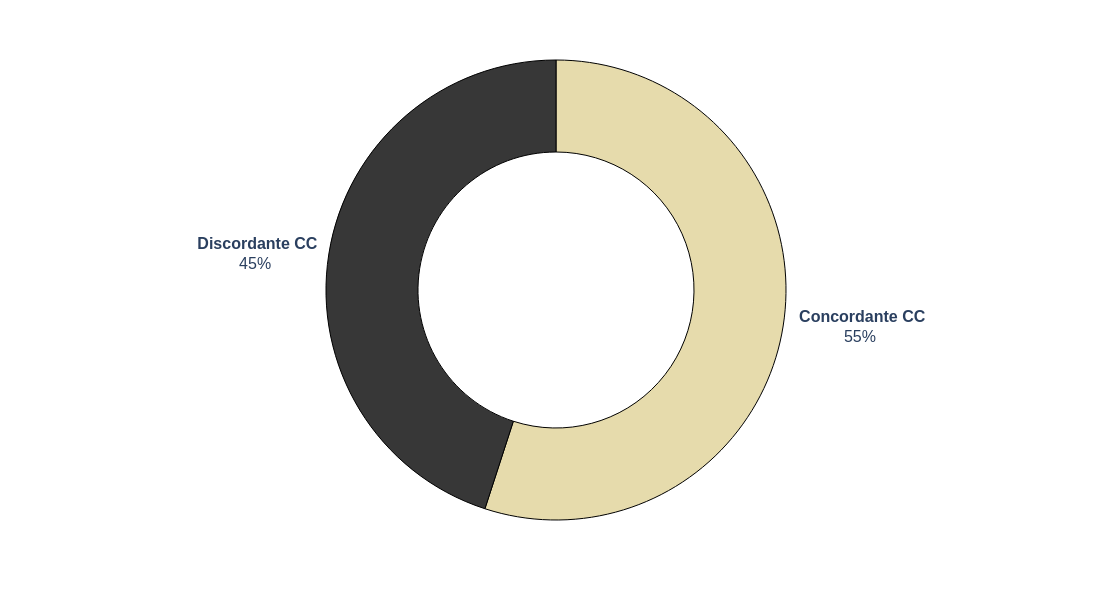

save as  Porcentagem_de_áreas_de_concordancia_com_IBGE,_ano_2020


In [55]:
dfCompIBGE = pd.read_csv(PathsIBGE)
dfCompIBGE = dfCompIBGE.drop(['system:index','.geo', 'territory'], axis=1)
print("columnas dfTable" , dfCompIBGE.columns)
print(dfCompIBGE.head())
#lstDF.append(df_tmp)
#os.remove(npath)
print(" =========================================")
dfGroup = dfCompIBGE.groupby(['class', 'year'])['area'].sum().reset_index()
print("agrupando por classe temos " , dfGroup.shape)
dfGroup['class'] = dfGroup['class'].astype(str)
dfGroup['name_class'] = dfGroup['class']
dfGroup['name_class'].replace(dict_nameIncid, inplace=True)
print(" ",dfGroup.head())

ano = 2020
nomeLegend = "Concordancia"
namePlot = "Porcentagem de áreas de concordancia com IBGE, ano " + str(ano)
plot_pie_areasEstaveis(dfGroup[dfGroup['year'] == ano], namePlot, dict_CColor_concordancia, nomeLegend)


## Analises com a Serie historica 

In [56]:
def plot_Serie_areasEstaveis(df_tmp, titlePlot, dict_color, nameLegend):
    figBar = px.bar(
        df_tmp, 
        x='year', 
        y ='area',
        color='name_class', 
        color_discrete_map= dict_color,
        barmode='stack'
    )
    figBar.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         #automargin=True, 
        #         yref='paper',
        #         x= 0.02, xanchor="left",
        #         y= 1.0, yanchor="bottom", 
        # ),
        width = 1100,
        height = 400,
        legend_title=nameLegend,
        legend_title_font_size=15,
        yaxis=dict(
            title='Área em hectare (milhões)',
            titlefont_size=16,
            tickfont_size=14,
        ),
        xaxis=dict(
            title='Anos da serie historica',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.4,
            xanchor="right",
            x=0.6
        )
    )
    figBar.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    figBar.write_image("imagePPT/" + titlePlot + '.png')

columnas dfTable Index(['area', 'class', 'year'], dtype='object')
           area  class  year
0      0.001786      1  2000
1  48999.584390      1  2000
2  69805.581342      2  2000
3  68396.656325      1  2000
4  80477.385607      2  2000
agrupando por classe temos  (14, 3)
    class  year           area              name_class
0     1  2000  405289.365978  <b> Discordante CC</b>
1     1  2010  392833.174815  <b> Discordante CC</b>
2     1  2012  385779.897994  <b> Discordante CC</b>
3     1  2014  382519.376617  <b> Discordante CC</b>
4     1  2016  382757.939680  <b> Discordante CC</b>


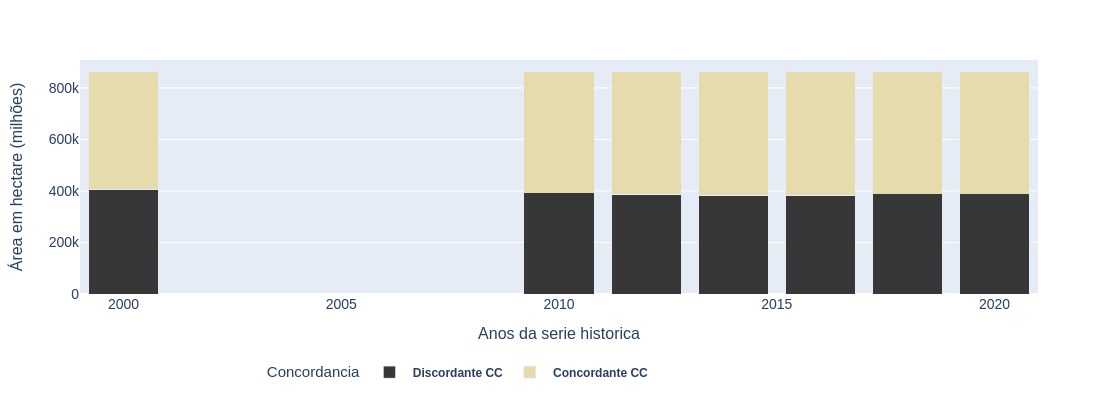

save as  Serie_temporal_de_áreas_de_concordancia_mapa_FINAL_vs_INTEGRAÇÂO


In [57]:
dfCompIBGE = pd.read_csv(PathsIBGE)
dfCompIBGE = dfCompIBGE.drop(['system:index','.geo', 'territory'], axis=1)
print("columnas dfTable" , dfCompIBGE.columns)
print(dfCompIBGE.head())
#lstDF.append(df_tmp)
#os.remove(npath)
print(" =========================================")
dfGroup = dfCompIBGE.groupby(['class', 'year'])['area'].sum().reset_index()
print("agrupando por classe temos " , dfGroup.shape)
dfGroup['class'] = dfGroup['class'].astype(str)
dfGroup['name_class'] = dfGroup['class']
dfGroup['name_class'].replace(dict_nameIncid, inplace=True)
print(" ",dfGroup.head())

nomeLegend = "Concordancia"
namePlot = "Serie temporal de áreas de concordancia mapa FINAL vs INTEGRAÇÂO"
plot_Serie_areasEstaveis(dfGroup, namePlot, dict_CColor_concordancia, nomeLegend)

columnas dfTable Index(['area', 'class', 'year'], dtype='object')
            area  class  year
0       0.001786      1  1985
1    3891.986850      1  1985
2  114913.178881      2  1985
3    7491.054964      1  1985
4  141382.986969      2  1985
agrupando por classe temos  (74, 3)
    class  year          area              name_class
0     1  1985  38943.854407  <b> Discordante CC</b>
1     1  1986  35576.061422  <b> Discordante CC</b>
2     1  1987  36686.191369  <b> Discordante CC</b>
3     1  1988  44504.262508  <b> Discordante CC</b>
4     1  1989  46280.716534  <b> Discordante CC</b>


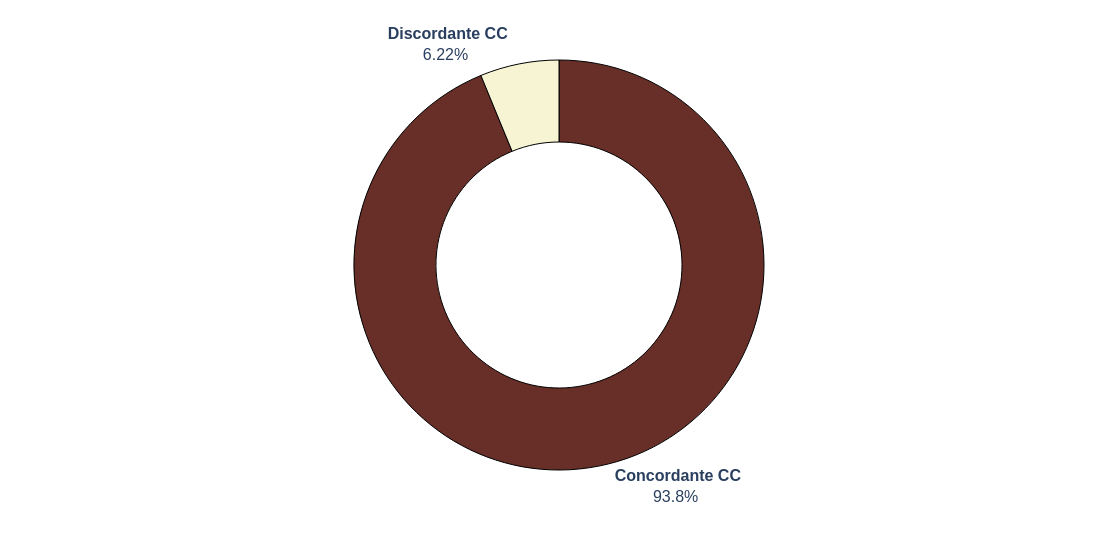

save as  Concordancia_entre_FINAL_e_INTEGRAÇÂO,_2020


In [62]:
dfCompCol8 = pd.read_csv(PathColseInt_8)
dfCompCol8 = dfCompCol8.drop(['system:index','.geo', 'territory'], axis=1)
print("columnas dfTable" , dfCompCol8.columns)
print(dfCompCol8.head())
#lstDF.append(df_tmp)
#os.remove(npath)

print(" =========================================")
dfGroup = dfCompCol8.groupby(['class', 'year'])['area'].sum().reset_index()
print("agrupando por classe temos " , dfGroup.shape)
dfGroup['class'] = dfGroup['class'].astype(str)
dfGroup['name_class'] = dfGroup['class']
dfGroup['name_class'].replace(dict_nameIncid, inplace=True)
print(" ",dfGroup.head())

ano = 2020
nomeLegend = "Concordancia"
namePlot = "Concordancia entre FINAL e INTEGRAÇÂO, " + str(ano)
plot_pie_areasEstaveis(dfGroup[dfGroup['year'] == ano], namePlot, dict_CColor_col8, nomeLegend)


columnas dfTable Index(['area', 'class', 'year'], dtype='object')
            area  class  year
0       0.001786      1  1985
1    3891.986850      1  1985
2  114913.178881      2  1985
3    7491.054964      1  1985
4  141382.986969      2  1985
agrupando por classe temos  (74, 3)
    class  year          area              name_class
0     1  1985  38943.854407  <b> Discordante CC</b>
1     1  1986  35576.061422  <b> Discordante CC</b>
2     1  1987  36686.191369  <b> Discordante CC</b>
3     1  1988  44504.262508  <b> Discordante CC</b>
4     1  1989  46280.716534  <b> Discordante CC</b>


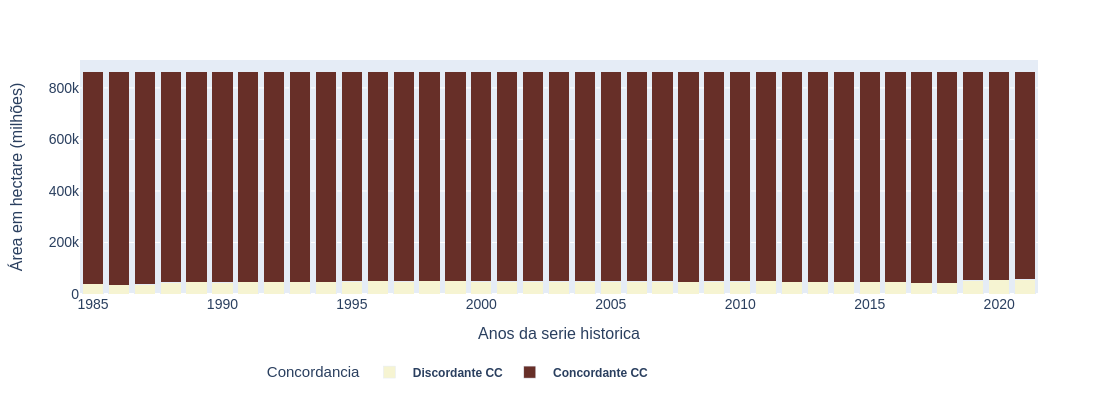

save as  Serie_temporal_de_áreas_de_concordancia_entre_FINAL_e_INTEGRAÇÂO


In [64]:
dfCompCol8 = pd.read_csv(PathColseInt_8)
dfCompCol8 = dfCompCol8.drop(['system:index','.geo', 'territory'], axis=1)
print("columnas dfTable" , dfCompCol8.columns)
print(dfCompCol8.head())
#lstDF.append(df_tmp)
#os.remove(npath)
print(" =========================================")
dfGroup = dfCompCol8.groupby(['class', 'year'])['area'].sum().reset_index()
print("agrupando por classe temos " , dfGroup.shape)
dfGroup['class'] = dfGroup['class'].astype(str)
dfGroup['name_class'] = dfGroup['class']
dfGroup['name_class'].replace(dict_nameIncid, inplace=True)
print(" ",dfGroup.head())

nomeLegend = "Concordancia"
namePlot = "Serie temporal de áreas de concordancia entre FINAL e INTEGRAÇÂO"
plot_Serie_areasEstaveis(dfGroup, namePlot, dict_CColor_col8, nomeLegend)